In [3]:
!python --version

Python 3.12.7


In [ ]:
!pip install pandas matplotlib

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [6]:
df = pd.read_csv('data/Laptop-Price.csv')
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Flash Storage,Hybrid,Gpu Brand,Gpu Model,Unnamed: 16,Price_euros
0,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8GB,No OS,Intel,Core i5 7200U,2.5GHz,256,0,0,0,Intel,HD Graphics 620,NaN,575.0
1,Acer,Aspire 3,Notebook,15.6,1366x768,4GB,Windows 10,AMD,A9-Series 9420,3GHz,0,500,0,0,AMD,Radeon R5,NaN,400.0
2,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,16GB,Windows 10,Intel,Core i7 8550U,1.8GHz,512,0,0,0,Nvidia,GeForce MX150,NaN,1495.0
3,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,8GB,Windows 10,Intel,Core i5 8250U,1.6GHz,256,0,0,0,Intel,UHD Graphics 620,NaN,770.0
4,HP,250 G6,Notebook,15.6,1366x768,4GB,No OS,Intel,Core i5 7200U,2.5GHz,0,500,0,0,Intel,HD Graphics 620,NaN,393.9


In [42]:
df.shape

(1146, 18)

(array([252.,   0.,   0.,  77.,   0.,   0., 126.,   0.,   0., 284.,   0.,
          0., 267.,   0.,   0.,  54.,   0.,   0.,   5.,   0.,   0.,  47.,
          0.,   0.,   0.,   2.,   0.,   0.,   4.,   0.,   0.,   7.,   0.,
          0.,   3.,   0.,   0.,   3.,   0.,   0.,   7.,   0.,   0.,   3.,
          0.,   0.,   1.,   0.,   0.,   4.]),
 array([ 0.  ,  0.32,  0.64,  0.96,  1.28,  1.6 ,  1.92,  2.24,  2.56,
         2.88,  3.2 ,  3.52,  3.84,  4.16,  4.48,  4.8 ,  5.12,  5.44,
         5.76,  6.08,  6.4 ,  6.72,  7.04,  7.36,  7.68,  8.  ,  8.32,
         8.64,  8.96,  9.28,  9.6 ,  9.92, 10.24, 10.56, 10.88, 11.2 ,
        11.52, 11.84, 12.16, 12.48, 12.8 , 13.12, 13.44, 13.76, 14.08,
        14.4 , 14.72, 15.04, 15.36, 15.68, 16.  ]),
 <BarContainer object of 50 artists>)

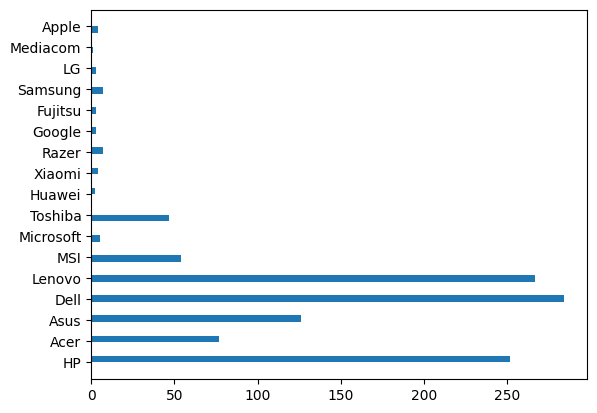

In [20]:
# распределение ноутбуков по фирмам
plt.hist(x=df['Company'],bins=50,orientation='horizontal')

(array([329., 410., 267.,  59.,  47.,   6.,  10.,   3.,  10.,   5.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <BarContainer object of 10 artists>)

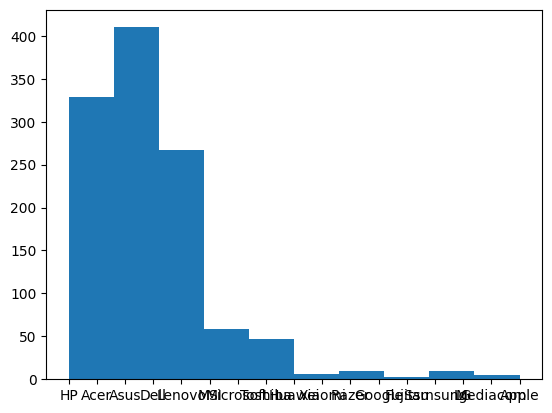

In [30]:
# распределение ноутбуков по фирмам "нечитабельное" 
plt.hist(x=df['Company'])

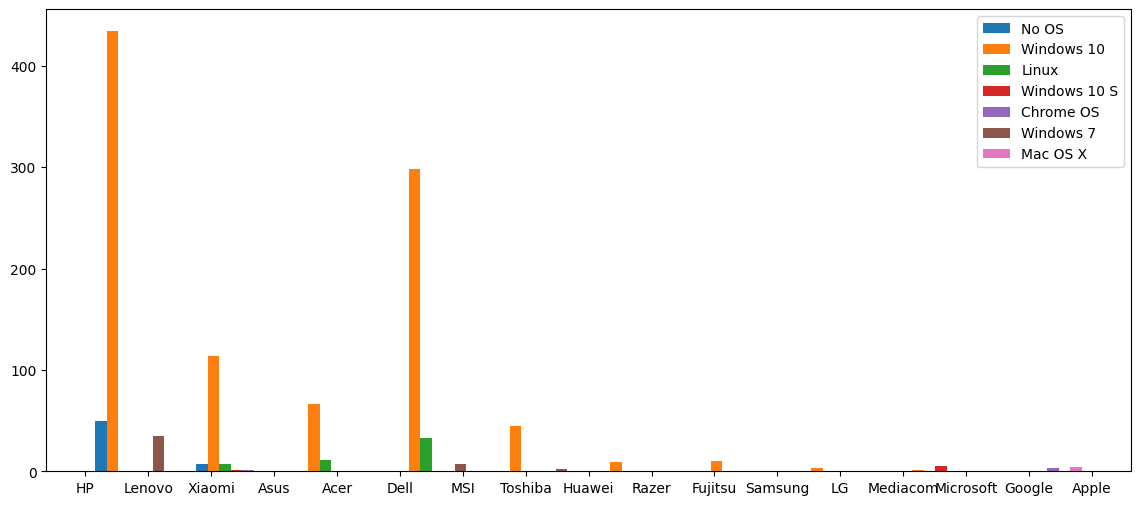

In [38]:
#гистограмма распределения ОС / фирма
x = []

plt.figure(figsize=(14, 6))

for opsys in df['OpSys'].unique():
    x.append(list(df[df['OpSys'] == opsys]['Company']))
plt.hist(x, label=df['OpSys'].unique())
plt.legend()

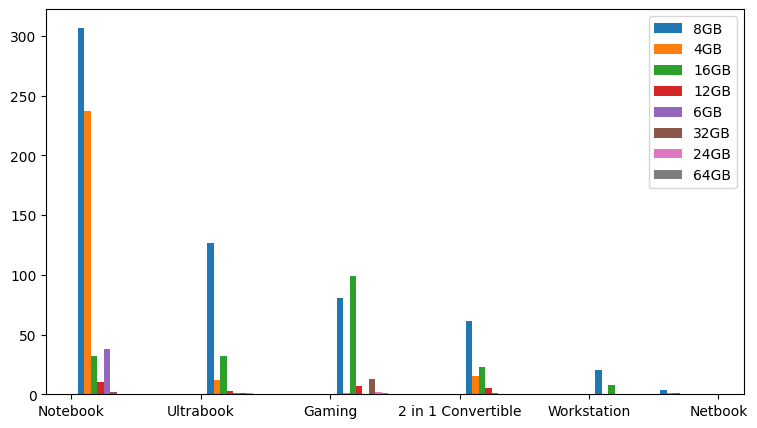

In [66]:
#гистограмма распределения RAM / тип ноутбука
plt.figure(figsize=(9, 5))

x = []

for brand in df['Ram'].unique():
    x.append(list(df[df['Ram'] == brand]['TypeName']))
plt.hist(x, label=df['Ram'].unique())
plt.legend()

Text(0, 0.5, 'Inches')

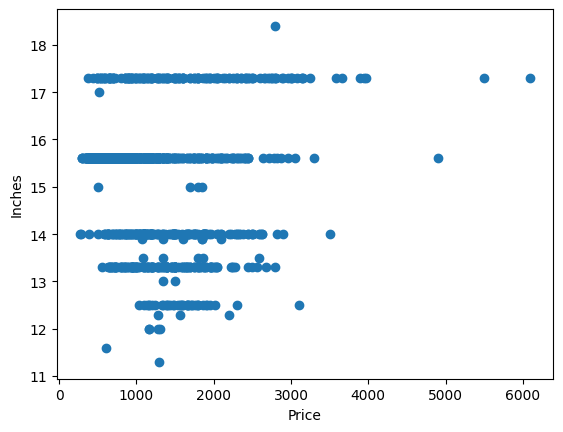

In [43]:
#диаграмма рассеивания цена / диагональ

plt.scatter(x=df['Price_euros'], y=df['Inches'])
plt.xlabel('Price')
plt.ylabel('Inches')

<Axes: title={'center': 'Price_euros'}, xlabel='Company'>

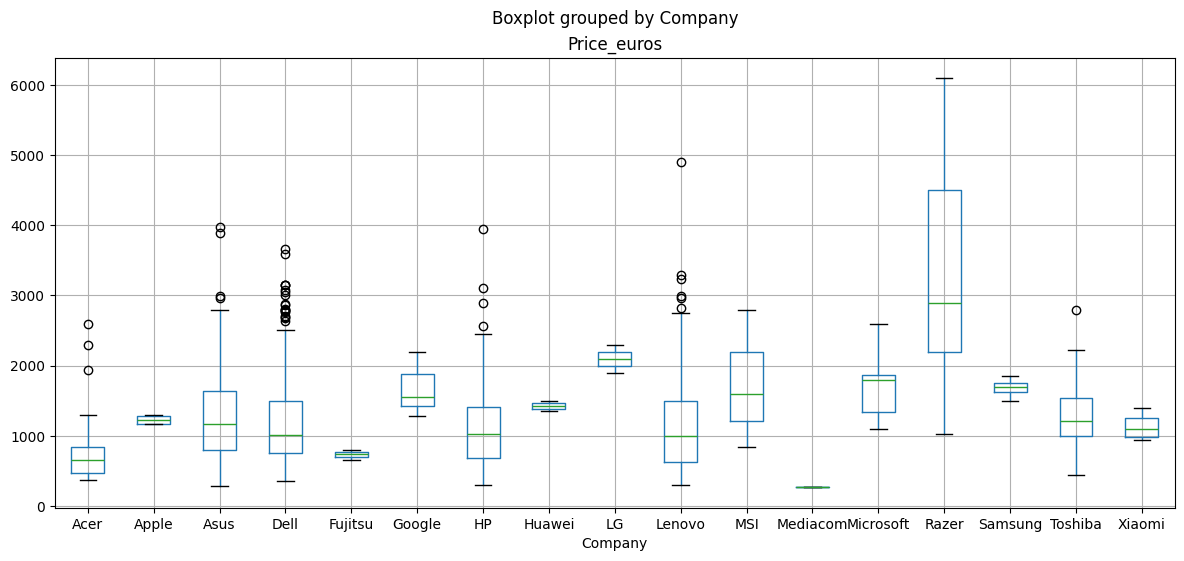

In [49]:
# boxplot цены по компаниям

df.boxplot(by='Company', column='Price_euros',figsize=(14,6))

Text(0, 0.5, 'Price')

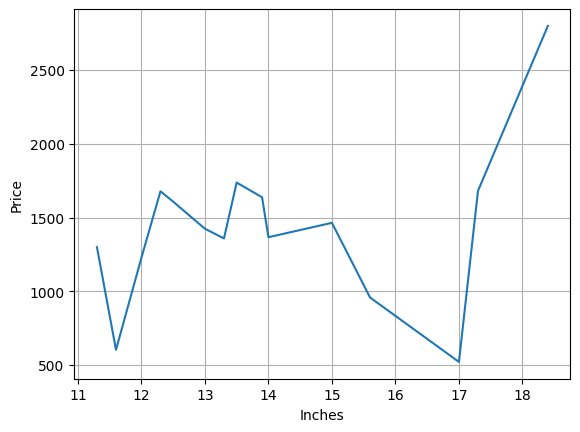

In [50]:
# график средней цены по диагонали экрана
grdf = df.groupby('Inches', as_index=False)['Price_euros'].mean()
plt.plot(grdf['Inches'], grdf['Price_euros'])
plt.grid()
plt.xlabel('Inches')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

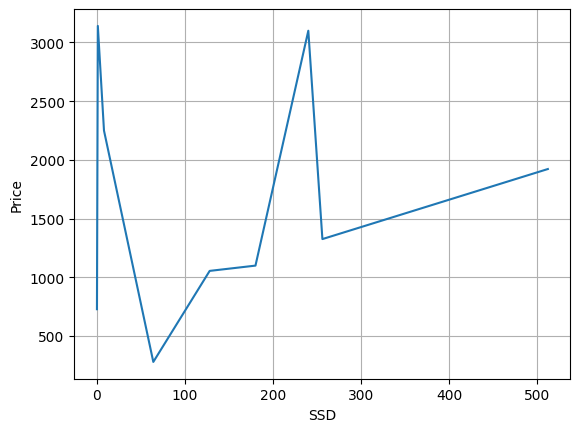

In [51]:
# график средней цены по SSD
grdf = df.groupby('SSD', as_index=False)['Price_euros'].mean()
plt.plot(grdf['SSD'], grdf['Price_euros'])
plt.grid()
plt.xlabel('SSD')
plt.ylabel('Price')

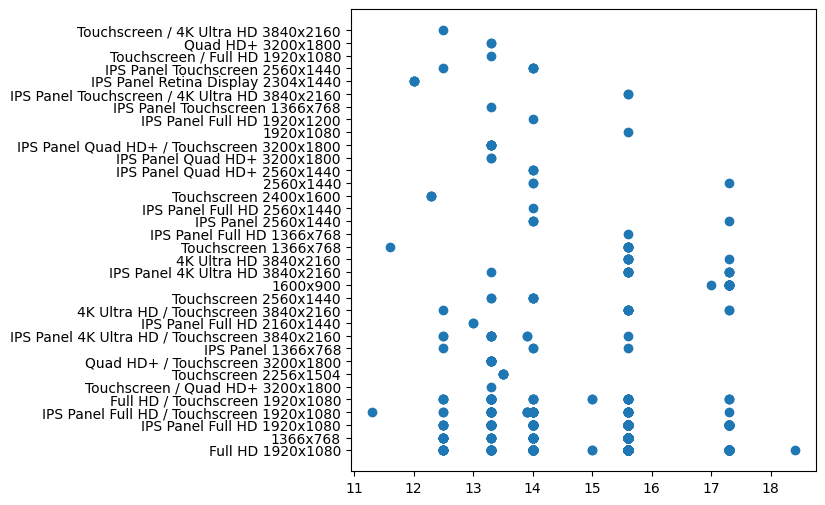

In [58]:
# диаграмма рассеяния (диагональ / разрешение)
plt.figure(figsize=(6, 6))
plt.scatter(y=df['ScreenResolution'], x=df['Inches'])

(array([578.,   0.,   0.,   0.,   0., 173.,   0.,   0.,   0., 395.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

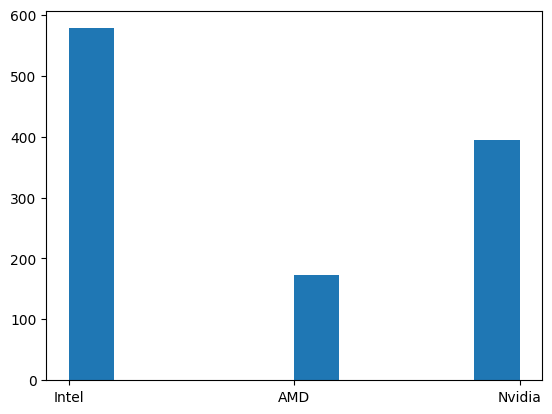

In [60]:
#гистограмма GPU providers
plt.hist(x=df['Gpu Brand'])

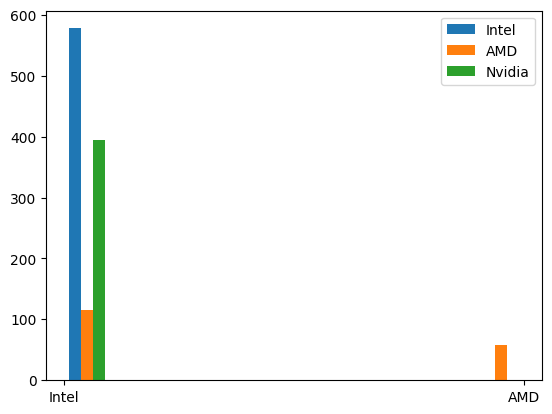

In [62]:
#гистограмма GPU providers по CPU providers
x = []

for brand in df['Gpu Brand'].unique():
    x.append(list(df[df['Gpu Brand'] == brand]['Cpu Brand']))
plt.hist(x, label=df['Gpu Brand'].unique())
plt.legend()